In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dating-full.csv")
df[:5]

,gender,age,age_o,race,race_o,samerace,importance_same_race,importance_same_religion,field,pref_o_attractive,...,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,like,decision
0,female,21,27,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,Law,35.0,...,1,10,10,9,8,1,0.14,3,7.0,1
1,female,21,22,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,Law,60.0,...,1,10,10,9,8,1,0.54,3,7.0,1
2,female,21,23,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,Law,30.0,...,1,10,10,9,8,1,0.61,3,7.0,1
3,female,21,24,'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,2,4,Law,30.0,...,1,10,10,9,8,1,0.21,3,6.0,1
4,female,21,25,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,Law,50.0,...,1,10,10,9,8,1,0.25,3,6.0,0


## 1. Preprocessing 

In [3]:
# first preprocessing the first two parts
func_dict = {
    1: lambda x: x[0] == '"' or x[0] == "'",
    2: lambda x: any(y.isupper() for y in x),   
}
def race_f(x):
    if func_dict[1](x):
        return x[1:-1]
    else:
        return x
modi_dict = {
    1: race_f,
    2: lambda x: x.lower(),   
}
str_dict = {
    1: "Quotes removed from {} cells.",
    2: "Standardized {} cells to lower case.",  
}
def cond(name, index):
    return df[name].apply(func_dict[index])
def modify(name, index):
    df[name] = df[name].apply(modi_dict[index])

def handle_pre(name, index):
    ret = np.sum(cond(name, index))
    modify(name, index)
    return ret

s_ = handle_pre("race", 1)
s_ += handle_pre("race_o", 1)
s_ += handle_pre("field", 1)
print(str_dict[1].format(s_))
s_ = handle_pre("field", 2)
print(str_dict[2].format(s_))

Quotes removed from 8316 cells.
Standardized 5707 cells to lower case.


In [4]:
# then label encoding
str_lbenc = "Value assigned for {} in column {}: {}."
def handle_enc(name):
    Set = sorted(set(df[name])) # Alphabetically sorted
    Dict = {}
    for index, value in enumerate(Set):
        Dict[value] = index
        print(str_lbenc.format(value, name, index))
    df[name] = df[name].apply(lambda x:Dict[x])
    f = open(f"tmp/{name}.txt", "w")
    f.write(f"{len(Set)}")
    
handle_enc("gender")
handle_enc("race")
handle_enc("race_o")
handle_enc("field")

Value assigned for female in column gender: 0.
Value assigned for male in column gender: 1.
Value assigned for Asian/Pacific Islander/Asian-American in column race: 0.
Value assigned for Black/African American in column race: 1.
Value assigned for European/Caucasian-American in column race: 2.
Value assigned for Latino/Hispanic American in column race: 3.
Value assigned for Other in column race: 4.
Value assigned for Asian/Pacific Islander/Asian-American in column race_o: 0.
Value assigned for Black/African American in column race_o: 1.
Value assigned for European/Caucasian-American in column race_o: 2.
Value assigned for Latino/Hispanic American in column race_o: 3.
Value assigned for Other in column race_o: 4.
Value assigned for acting in column field: 0.
Value assigned for african-american studies/history in column field: 1.
Value assigned for american studies in column field: 2.
Value assigned for american studies [masters] in column field: 3.
Value assigned for anthropology in col

In [5]:
# finally normalization
str_nor = "Mean of {}: {:0.2f}."
psop = [
    "attractive_important", 
    "sincere_important", 
    "intelligence_important", 
    "funny_important", 
    "ambition_important", 
    "shared_interests_important"
]
psoo = [
    "pref_o_attractive", 
    "pref_o_sincere", 
    "pref_o_intelligence", 
    "pref_o_funny", 
    "pref_o_ambitious", 
    "pref_o_shared_interests"
]
rofp = [
    "attractive_partner", 
    "sincere_partner", 
    "intelligence_parter", 
    "funny_partner", 
    "ambition_partner", 
    "shared_interests_partner"
]

def handle_nor(LIST):
    df[LIST] = df[LIST].apply(lambda x: x/np.sum(x), axis = 1)

handle_nor(psop)
handle_nor(psoo)
[print(str_nor.format(name, np.mean(df[name]))) for name in psop + psoo]
None

Mean of attractive_important: 0.22.
Mean of sincere_important: 0.17.
Mean of intelligence_important: 0.20.
Mean of funny_important: 0.17.
Mean of ambition_important: 0.11.
Mean of shared_interests_important: 0.12.
Mean of pref_o_attractive: 0.22.
Mean of pref_o_sincere: 0.17.
Mean of pref_o_intelligence: 0.20.
Mean of pref_o_funny: 0.17.
Mean of pref_o_ambitious: 0.11.
Mean of pref_o_shared_interests: 0.12.


## 2. Visualization


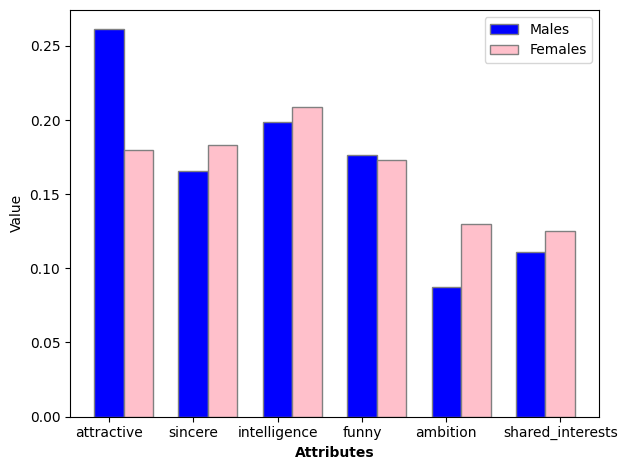

In [6]:
#(1)

Males = np.mean(
    df[
        df["gender"] == 1
    ][
        psop
    ],
    axis = 0
)

Females = np.mean(
    df[
        df["gender"] == 0
    ][
        psop
    ],
    axis = 0
)


barWidth = 0.35
r1 = list(range(6))
r2 = [x + barWidth for x in r1]
plt.bar(r1, Males, width=barWidth, color='blue', edgecolor='grey', label='Males')
plt.bar(r2, Females, width=barWidth, color='pink', edgecolor='grey', label='Females')
plt.ylabel('Value')
plt.xlabel('Attributes', fontweight='bold')
plt.xticks(r1[:-1]+[r2[-1]], [ s[:-10] for s in psop])
plt.legend()
plt.tight_layout()
plt.show()

### We found:
 1. Man Favor: attractive
 2. Woman Favor: intelligence
 3. Man dislikes Woman's ambition, while ambition and shared_interests are both not so important for Woman.
 4. Woman's score is more average than Man's (or to say the variance is small)

attractive_partner has 17 different values:
[0.0, 1.0, 2.0, 3.0, 3.5, 4.0, 5.0, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 9.9, 10.0]
sincere_partner has 13 different values:
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 7.5, 8.0, 8.5, 9.0, 10.0]
intelligence_parter has 17 different values:
[0.0, 1.0, 2.0, 2.5, 3.0, 4.0, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]
funny_partner has 16 different values:
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]
ambition_partner has 14 different values:
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]
shared_interests_partner has 15 different values:
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 10.0]


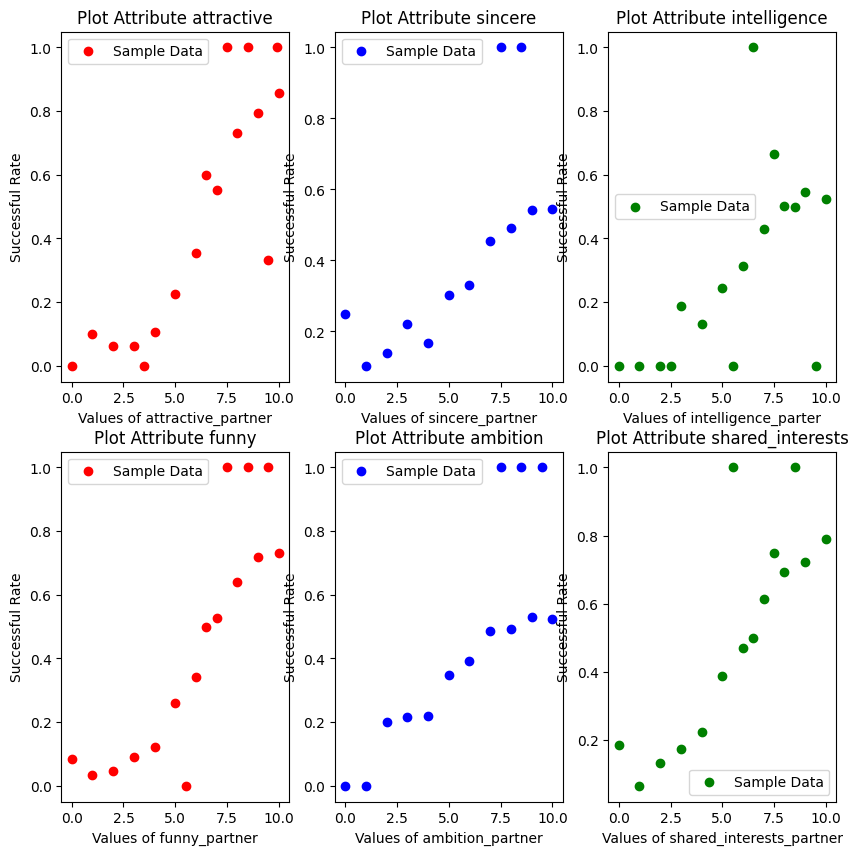

In [7]:
# (2).
col = ['red', 'blue', 'green']
def scatter_plot(inx, x, y, name):
    ax_now = plt.subplot(2, 3, inx + 1)
    ax_now.scatter(x, y, color=col[inx%3], marker='o', label='Sample Data')
    ax_now.set_title('Plot Attribute {}'.format(name[:-8 + int(name[-3] == 't')]))
    ax_now.set_xlabel('Values of {}'.format(name))
    ax_now.set_ylabel('Successful Rate')
    ax_now.legend()


def plot_col(inx, name):
    value_set = sorted(set(df[name]))
    print(f"{name} has {len(value_set)} different values:")
    print(value_set)
    Y = [
        np.mean(
            df[
                df[name] == value
            ][
                "decision"
            ]
        )
            for value in value_set
    ]
    scatter_plot(inx, value_set, Y, name)

plt.figure(figsize=(10, 10))
for inx, name in enumerate(rofp):
    plot_col(inx, name)
plt.show()

### We found:
 1. the succ rate has the positive relation with the score on every attribute, additionally it's like a linear relation.
 2. In some value the succ rate equals to 0 or 1, which means the sample size (for some value) is too small to give a fair estimation of the succ rate.

## 3. Final preprocessing

In [8]:
discrete = set(["gender", "race", "race_o", "samerace", "field", "decision"])
continuous = list(set(df.columns) - discrete)
df["interests_correlate"] = df["interests_correlate"].apply(lambda x: (x + 1)*5)
for name in psop + psoo:
    df[name] = df[name].apply(lambda x: x * 10)
df["age"] = df["age"].apply(lambda x: (x-18)/4)
df["age_o"] = df["age_o"].apply(lambda x: (x-18)/4)
df.to_csv("dating-unbinned.csv") # firstly saved the unbinned data
for col in continuous:
    df[col] = df[col].apply(lambda x: int(np.floor(max(min(x, 9.99999), 0.000) / 2)))

In [9]:
for col in sorted(continuous):
    print("{}: [{} {} {} {} {}]".format(
                                        col,
                                        len(df[df[col] == 0]),
                                        len(df[df[col] == 1]),
                                        len(df[df[col] == 2]),
                                        len(df[df[col] == 3]),
                                        len(df[df[col] == 4]),
                                    )
    )

age: [3032 3491 196 20 5]
age_o: [2990 3495 238 16 5]
ambition: [0 225 697 1867 3955]
ambition_important: [6246 498 0 0 0]
ambition_partner: [34 237 1309 2784 2380]
art: [90 624 1262 1863 2905]
attractive: [0 131 726 3260 2627]
attractive_important: [2990 3103 545 87 19]
attractive_partner: [87 519 1661 2743 1734]
clubbing: [651 824 1196 2040 2033]
concerts: [55 516 1199 2177 2797]
dining: [29 68 602 1864 4181]
exercise: [223 895 1266 1959 2401]
expected_happy_with_sd_people: [107 841 2289 2808 699]
funny: [0 9 84 1000 5651]
funny_important: [3934 2750 60 0 0]
funny_partner: [100 413 1471 2723 2037]
gaming: [1573 1877 1453 1292 549]
hiking: [364 1389 1321 1743 1927]
importance_same_race: [2201 1629 897 886 1131]
importance_same_religion: [2507 1475 977 848 937]
intelligence: [0 127 409 2157 4051]
intelligence_important: [2504 4105 135 0 0]
intelligence_parter: [14 76 657 2696 3301]
interests_correlate: [18 713 2498 2883 632]
like: [92 511 1614 2965 1562]
movies: [0 144 462 1747 4391]
m

In [10]:
df.to_csv("dating-binned.csv")